**Instructions: answer the following questions with data and visuals**
===

1. **Describe the content of the dataset and its goals.**
2. **Describe the features and formulate a hypothesis on which might be relevant in predicting diabetes**
3. **Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.**
4. **Come up with a benchmark for the minimum performance that an algorithm should have on this dataset**
5. **What's the best performance you can get with kNN? Is kNN a good choice for this dataset?**
6. **What's the best performance you can get with Naive Bayes? Is NB a good choice for this dataset?**
7. **What's the best performance you can get with Logistic Regression? Is LR a good choice for this dataset?**
8. **What's the best performance you can get with Random Forest? Is RF a good choice for this dataset?**
9. **If you could only choose one, which classifer from the above that you already ran is best? How do you define best?** 


**1. Describe the content of the dataset and its goals.**
==
  - Subjects: Females 21 years of age or older, with Pima Indian heritage.
  - Predictive variables:
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
    3. Diastolic blood pressure (mm Hg) 
    4. Triceps skin fold thickness (mm) 
    5. 2-Hour serum insulin (mu U/ml) 
    6. Body mass index (weight in kg/(height in m)^2) 
    7. Diabetes pedigree function 
    8. Age (years) 
    9. Class variable (0 or 1) 
        - i.e. does the subject have diabetes
        - class value 1 is interpreted as "tested positive for diabetes"
  - Use the data available to predict if subject has diabetes.

**2. Describe the features and formulate a hypothesis on which might be relevant in predicting diabetes**
==
  - predictive variables given include:
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
        - A test to determine how quickly glucose leaves blood.
        - Used as a common test for diabetes.
        - "If the 2-hour blood glucose level is between 140 and 199 mg/dL, the person has a type of prediabetes called impaired glucose tolerance (IGT). If confirmed by a second test, a 2-hour glucose level of 200 mg/dL or above means a person has diabetes." - http://www.niddk.nih.gov/health-information/health-topics/Diabetes/diagnosis-diabetes-prediabetes/Pages/index.aspx
    3. Diastolic blood pressure (mm Hg)
        - Blood pressure when heart in between beats.
        - Normal: <80
        - Prehypertension: 80 – 89
        - High Blood Pressure (Hypertension) Stage 1: 90 – 99
        - High Blood Pressure (Hypertension) Stage 2: 100 or higher
        - Hypertensive Crisis (Emergency care needed): Higher than 110
    4. Triceps skin fold thickness (mm) 
        - Used to calculate a body fat percentage.
    5. 2-Hour serum insulin (mu U/ml) 
        - “2-hour post-glucose insulin levels” appears to be a good indicator of insulin resistance.
          - “Insulin resistance is a condition in which the body produces insulin but does not use it effectively. When people have insulin resistance, glucose builds up in the blood instead of being absorbed by the cells, leading to type 2 diabetes or prediabetes.” - http://www.niddk.nih.gov/health-information/health-topics/Diabetes/insulin-resistance-prediabetes/Pages/index.aspx#resistance
    6. Body mass index (weight in kg/(height in m)^2) 
       - Used to calculate body fat. 
    7. Diabetes pedigree function 
       - Likelihood of getting diabetes based on family history.
    8. Age (years) 
    9. Class variable (0 or 1)
 - **Hypothesis:** 
 ===
 "Glucose tolerance test", "2-Hour serum insulin", "BMI", and "Diabetes pedigree" will be strong predictors for the class vaible (diabetes yes = 1, no = 0). Higher results from the glucose tolerance test should be strongly related to diabetes. In addition, calculating the glucose to insulin ration will yeild strong predictive variable.
   - While reading up on this topic I found multiple sources discussing the "Glucose to insulin ration." I blieve that this metric will be a strong predictor. http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3136064/
   - The glucose tolerance test will need to be controlled because of missing data, and data that indicates prediavetes.
   - Anything with a "Glucose tolerance test" that == 0 or is above 139 must be removed.
      - Remove 0s because we cannot be sure that the data is correct.
      - **Remove anything above 139 because glucose above 139 could be prediabetes, which would mean that the person does not have diabetes but is at risk. At risk data points will not be good training data for predictions.**

**3. Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.**
==
  - there are zeros in places where they are not biologically possible, such as the blood pressure attribute. It seems very likely that zero values encode missing data.
  - There is quite a bit of data missing:
      - Plasma glucose concentration a 2 hours in an oral glucose tolerance test - 5 rows
      - Diastolic blood pressure (mm Hg) - 35 rows
      - Triceps skin fold thickness (mm) - 227 rows
      - 2-Hour serum insulin (mu U/ml) - 347 rows
      - Body mass index (weight in kg/(height in m)^2) - 11 rows
  - After removing missing data, “Triceps skin fold thickness (mm)” and “Body mass index (weight in kg/(height in m)^2)” are 65% correlated.
      - Because “Triceps skin fold thickness (mm)” is missing more data we should drop that variable.
  - After removing missing data, “Plasma glucose concentration a 2 hours in an oral glucose tolerance test” and “2-Hour serum insulin (mu U/ml)” are 58% correlated.
      - Beacuse 2-Hour serum insulin (mu U/ml) is missing more data we should drop that variable.
  - After dropping variables we will remove rows with missing data for Plasma glucose concentration a “2 hours in an oral glucose tolerance test”, “Diastolic blood pressure (mm Hg)”, “Body mass index (weight in kg/(height in m)^2)”.
 
**Work shown below** 

**4. Come up with a benchmark for the minimum performance that an algorithm should have on this dataset**
==
  - In the cleaned dataframe for k nearest neighbor there are:
      - There are 534 data points
      - There are 121 people with diabetes
      - Benmark for predicting diabetes needs to be better than 22%
      - i.e. people with diabetes ÷ all people
  - In the cleaned dataframe for for all other models there are:
      - There are 284 data points
      - There are 58 people with diabetes
      - Benmark for predicting diabetes needs to be better than 20%
      - i.e. people with diabetes ÷ all people     
 

**Work shown below**

**5. What's the best performance you can get with kNN? Is kNN a good choice for this dataset?**
==
  - 84% is the best results.
   - The parameters were adjusted in the following ways:
     - uniform and distance
     - p = 1 OR 2
     - n_neighbors = 1, 101
  - kNN out performed the benchmarck of 22%
  - The Glucose insulin ratio was not a good predictor when used in KNN so this data was dropped.
  - In order to used the Gluse insulin ration all rows where "2-Hour serum insulin" == 0 must be dropped (i.e. Glucose insulin ration = Glucose test ÷ 2-Hour serum insulin). If 2-Hour serum insulin == 0, then Glucose insulin ration will not be a real number.
  
**Work shown below**

**6. What's the best performance you can get with Naive Bayes? Is NB a good choice for this dataset?**
==
  - My model is 78%.
  - KB out performed the benchmarck of 20%
  - When looking at the learning curve my model is highly biased. 
  - When I include more features to correct for high bias my model is remaining biased and losing accuracy. I believe I would need to determine the missing values to reduce the bias.
  
**Work shown below**

**7. What's the best performance you can get with Logistic Regression? Is LR a good choice for this dataset?**
==
  - Best performance is 81%
  - LR out performed the benchmarck of 20%
  - When vizualizing the data from Logistic Regression it looks biased. 
  - Alough we are getting a strong performance, I am skeptical of the findinges because of the bais.
  
**Work shown below**

**8. What's the best performance you can get with Random Forest? Is RF a good choice for this dataset?**
==
  - Best perforance is 77%
  - Random Forest out performed the benchmarck of 20%
  - I changed the parameteres for random forest multiples times and still remained under 80%.
  - Because of the nature of this algorithm (black box) I am a little confused on how I could tweak parameters to increase the accuracy.
  
**Work shown below**

**9. If you could only choose one, which classifer from the above that you already ran is best? How do you define best?** 
==

From the models above K nearest neighbor (kNN) is the best in terms of performance and interpretability. kNN did not require any additional features, and actually performed worse with additional features. kNN also had the higher accuracy than the rest of the mobels tested. In addition to the high accuracy, and least amount of tweaking, kNN is extremely easy to interpret and explain to non-technical audiences.



**Code to answer questions:**
===

**Import Data**
===

In [51]:
import requests
import pandas as pd
import csv
import numpy as np

# Use request to get data
r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data')
raw_data = r.text

# Save the data as a dataframe with head to understand headers
column_names = ['Pregnant',
                'Glucose tolerance test',
                'Diastolic blood pressure',
                'Triceps thickness',
                '2-Hour serum insulin',
                'Body mass index',
                'Diabetes pedigree',
                'Age',
                'Class variable']
# split data by '\n' because it comes in as a large txt file and needs to be converted to a dataframe
data = raw_data.split('\n')

pima_indian_data = pd.DataFrame(np.loadtxt(data, delimiter=","), columns=column_names)

# view the data
pima_indian_data.head()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
# get more information on the data
pima_indian_data.describe()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
# get more information on the data
pima_indian_data.corr()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
Pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2-Hour serum insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class variable,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**3. Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.**
==

In [54]:
# How many times does Plasma gluscose == 0?
# Does this Plasma gluscose as 0 make sense?
# Are we able to get rid of this data?
# We can probably just get rid of this data. There is not much of it
# and zeros here seem suspicious. 
pima_indian_data[pima_indian_data['Glucose tolerance test'] == 0].shape[0]

5

In [55]:
# Show dataframe
pima_indian_data[pima_indian_data['Glucose tolerance test'] == 0]

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
# How many times does Diastolic blood pressure == 0?
# Does the Diastolic blood pressure as 0 make sense?
# Are we able to get rid of this data?
pima_indian_data[pima_indian_data['Diastolic blood pressure'] == 0].shape[0]

35

In [10]:
# Show dataframe (head)
pima_indian_data[pima_indian_data['Diastolic blood pressure'] == 0].head(10)

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [11]:
# How many times does Body mass index == 0?
# Does the Body mass index as 0 make sense?
# Are we able to get rid of this data?
pima_indian_data[pima_indian_data['Body mass index'] == 0].shape[0]

11

In [12]:
# Show dataframe
pima_indian_data[pima_indian_data['Body mass index'] == 0]

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
9,8,125,96,0,0,0,0.232,54,1
49,7,105,0,0,0,0,0.305,24,0
60,2,84,0,0,0,0,0.304,21,0
81,2,74,0,0,0,0,0.102,22,0
145,0,102,75,23,0,0,0.572,21,0
371,0,118,64,23,89,0,1.731,21,0
426,0,94,0,0,0,0,0.256,25,0
494,3,80,0,0,0,0,0.174,22,0
522,6,114,0,0,0,0,0.189,26,0
684,5,136,82,0,0,0,0.640,69,0


In [13]:
# How many times does Triceps skin fold thickness == 0?
# Does the Triceps skin fold thickness as 0 make sense?
# Are we able to get rid of this data?
pima_indian_data[pima_indian_data['Triceps thickness'] == 0].shape[0]

227

In [14]:
# Show dataframe
# I Think that is possible
pima_indian_data[pima_indian_data['Triceps thickness'] == 0].head(10)

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
15,7,100,0,0,0,30.0,0.484,32,1
17,7,107,74,0,0,29.6,0.254,31,1
21,8,99,84,0,0,35.4,0.388,50,0


In [15]:
# Show correlations between ways to measure body fat
# remove the rows with zero's for tricep... and BMI.
x_see_corr = pima_indian_data[(pima_indian_data['Triceps thickness'] > 0) & 
                     (pima_indian_data['Body mass index'] > 0)]

# Save dataframe to compare tricep... and BMI.
body_fat_measures = x_see_corr[['Triceps thickness',
                      'Body mass index']]

# Show correlation between tricep... and BMI.
body_fat_measures.corr()

,Triceps thickness,Body mass index
Triceps thickness,1.000000,0.648214
Body mass index,0.648214,1.000000


In [16]:
# Is that stronger than the rest of the varaibles?
# Yes, much stronger.
x_see_corr.corr()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
Pregnant,1.000000,0.125577,0.168618,0.098199,-0.008995,0.019481,0.011016,0.643316,0.262370
Glucose tolerance test,0.125577,1.000000,0.209820,0.210895,0.459226,0.231412,0.165318,0.270644,0.464466
Diastolic blood pressure,0.168618,0.209820,1.000000,0.218853,0.028083,0.287365,0.000130,0.321851,0.167227
Triceps thickness,0.098199,0.210895,0.218853,1.000000,0.125384,0.648214,0.120578,0.165072,0.258356
2-Hour serum insulin,-0.008995,0.459226,0.028083,0.125384,1.000000,0.188154,0.151501,0.081437,0.206811
Body mass index,0.019481,0.231412,0.287365,0.648214,0.188154,1.000000,0.152771,0.081676,0.308708
Diabetes pedigree,0.011016,0.165318,0.000130,0.120578,0.151501,0.152771,1.000000,0.074656,0.233312
Age,0.643316,0.270644,0.321851,0.165072,0.081437,0.081676,0.074656,1.000000,0.322298
Class variable,0.262370,0.464466,0.167227,0.258356,0.206811,0.308708,0.233312,0.322298,1.000000


In [18]:
# Show correlation between types of diabetes tests
x_see_corr_2 = pima_indian_data[(pima_indian_data['2-Hour serum insulin'] > 0) & 
                     (pima_indian_data['Glucose tolerance test'] > 0)]

diabetes_test_corr = x_see_corr_2[['2-Hour serum insulin',
                          'Glucose tolerance test']]
diabetes_test_corr.corr()

,2-Hour serum insulin,Glucose tolerance test
2-Hour serum insulin,1.000000,0.581186
Glucose tolerance test,0.581186,1.000000


In [19]:
# Is that stronger than the rest of the varaibles?
# Yes, much stronger.
x_see_corr_2.corr()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
Pregnant,1.000000,0.198411,0.214386,0.094573,0.080322,-0.012632,-0.001579,0.680416,0.257900
Glucose tolerance test,0.198411,1.000000,0.210148,0.198987,0.581186,0.205579,0.136723,0.343592,0.515632
Diastolic blood pressure,0.214386,0.210148,1.000000,0.233180,0.099203,0.302267,-0.020404,0.300886,0.193438
Triceps thickness,0.094573,0.198987,0.233180,1.000000,0.182886,0.652877,0.152854,0.168928,0.256711
2-Hour serum insulin,0.080322,0.581186,0.099203,0.182886,1.000000,0.226756,0.128827,0.218125,0.302128
Body mass index,-0.012632,0.205579,0.302267,0.652877,0.226756,1.000000,0.111880,0.079125,0.270840
Diabetes pedigree,-0.001579,0.136723,-0.020404,0.152854,0.128827,0.111880,1.000000,0.075150,0.199835
Age,0.680416,0.343592,0.300886,0.168928,0.218125,0.079125,0.075150,1.000000,0.351897
Class variable,0.257900,0.515632,0.193438,0.256711,0.302128,0.270840,0.199835,0.351897,1.000000


In [56]:
# We should drop '2-Hour serum insulin (mu U/ml)' because it has a lot of empty cells
# and because it is moderately correlated to
# 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'.
# By dropping '2-Hour serum insulin (mu U/ml)' we will have more data to analyze

# How many data points from '2-Hour serum insulin (mu U/ml)' are zero?
pima_indian_data[pima_indian_data['2-Hour serum insulin'] == 0].shape[0]

374

In [231]:
# before we drop the missing data lets create the new variable "glucose insulin ratio"
pima_indian_data['Glucose Insulin ratio'] = (pima_indian_data['Glucose tolerance test']/pima_indian_data['2-Hour serum insulin'])

In [232]:
# drop missing data and make a new dataframe
pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0) & 
                     (pima_indian_data['Glucose tolerance test'] < 140) &
                     (pima_indian_data['Diastolic blood pressure'] > 0) & 
                    (pima_indian_data['Body mass index'] > 0)].drop(
                    ['Triceps thickness', '2-Hour serum insulin', 'Glucose Insulin ratio'], axis=1)
pima_predict_df.describe()


,Pregnant,Glucose tolerance test,Diastolic blood pressure,Body mass index,Diabetes pedigree,Age,Class variable
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,3.563670,106.925094,70.955056,31.596067,0.452837,31.563670,0.226592
std,3.233657,18.018075,12.330724,6.734722,0.304307,10.842669,0.419019
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,94.250000,62.000000,26.600000,0.237250,23.000000,0.000000
50%,3.000000,107.000000,70.000000,31.200000,0.367000,28.000000,0.000000
75%,5.000000,122.000000,78.000000,35.700000,0.591000,38.000000,0.000000
max,15.000000,139.000000,122.000000,67.100000,2.288000,81.000000,1.000000


In [233]:
# correlations within new dataframe
pima_predict_df.corr()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Body mass index,Diabetes pedigree,Age,Class variable
Pregnant,1.000000,0.050444,0.188756,0.026430,-0.032784,0.582859,0.193571
Glucose tolerance test,0.050444,1.000000,0.164628,0.105969,0.041015,0.127683,0.281072
Diastolic blood pressure,0.188756,0.164628,1.000000,0.260451,-0.052173,0.324883,0.109822
Body mass index,0.026430,0.105969,0.260451,1.000000,0.085662,0.044038,0.257411
Diabetes pedigree,-0.032784,0.041015,-0.052173,0.085662,1.000000,0.053022,0.200119
Age,0.582859,0.127683,0.324883,0.044038,0.053022,1.000000,0.194005
Class variable,0.193571,0.281072,0.109822,0.257411,0.200119,0.194005,1.000000


**4. Come up with a benchmark for the minimum performance that an algorithm should have on this dataset**
==

In [234]:
# Benchmark cleaneddata
# what is the chance that we can randomly predict if someone has diabetes? 
print 'There are %d data points'%pima_predict_df.shape[0]
print 'There are %d people with diabetes'% sum(pima_predict_df['Class variable'])
print 'Benmark for predicting diabetes needs to be better than %d%%'% (sum(pima_predict_df['Class variable'])/pima_predict_df.shape[0]*100)
print 'i.e. people with diabetes ÷ all people'

There are 534 data points
There are 121 people with diabetes
Benmark for predicting diabetes needs to be better than 22%
i.e. people with diabetes ÷ all people


**5. What's the best performance you can get with kNN? Is kNN a good choice for this dataset?**
==

In [193]:
from sklearn.cross_validation import KFold, cross_val_score
y, X = pima_predict_df['Class variable'], pima_predict_df.drop(['Class variable'], axis=1)
# Set up test and training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [122]:
X.dtypes

Pregnant                    float64
Glucose tolerance test      float64
Diastolic blood pressure    float64
Body mass index             float64
Diabetes pedigree           float64
Age                         float64
dtype: object

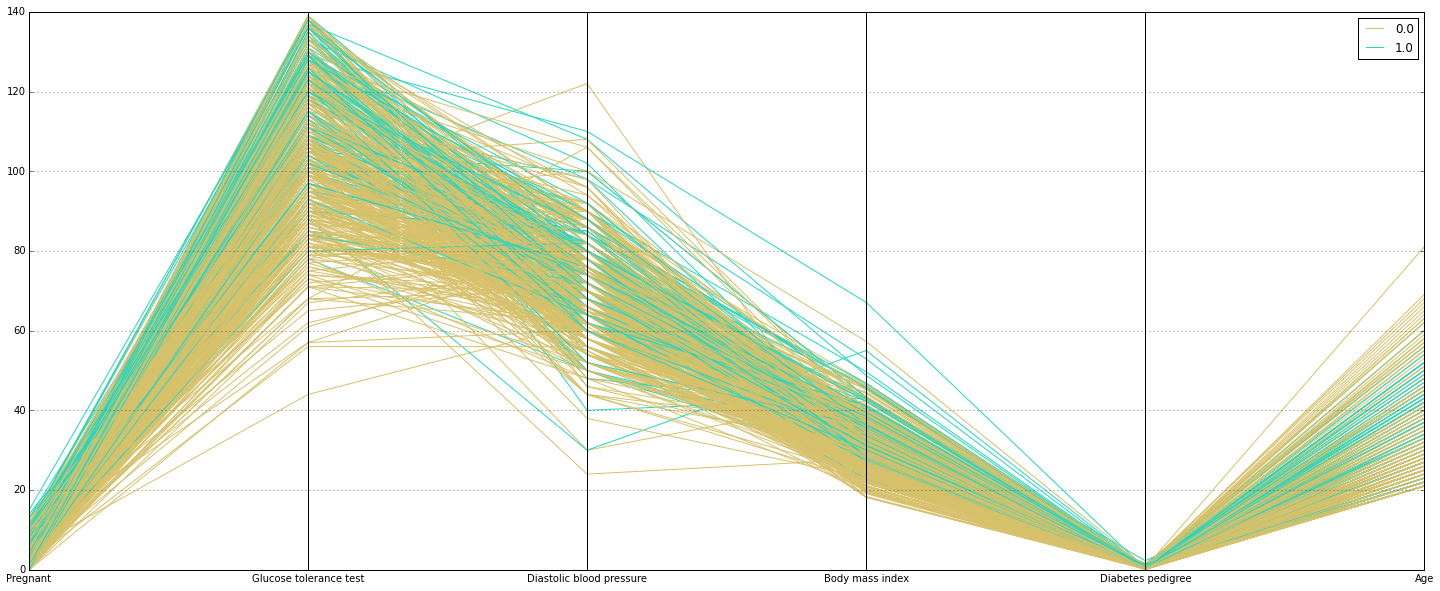

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,10))
pd.tools.plotting.parallel_coordinates(pima_predict_df, 'Class variable');

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [125]:
knn.predict(X_test)

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

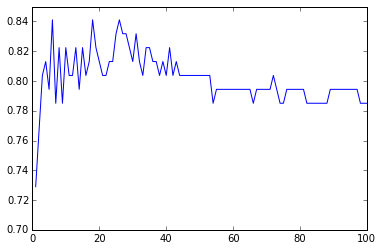

In [149]:
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
# YOUR CODE HERE
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=1)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, scores)
plt.ylim(.7, .85);

In [144]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', p=1)
knn.fit(X_train, y_train)
print knn.score(X_test, y_test)

0.841121495327


**6. What's the best performance you can get with Naive Bayes? Is NB a good choice for this dataset?**
==

In [236]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# create a new predict dataframe to split into test and train
# do not drop Glucose Insulin ratio
# drop rows where 2-hour serum insulin == 0

pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0) & 
                     (pima_indian_data['Glucose tolerance test'] < 140) & 
                     (pima_indian_data['Diastolic blood pressure'] > 0) &
                     (pima_indian_data['2-Hour serum insulin'] > 0) &
                    (pima_indian_data['Body mass index'] > 0)].drop(
                    ['Triceps thickness', '2-Hour serum insulin'], axis=1)

pima_predict_df.describe()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Body mass index,Diabetes pedigree,Age,Class variable,Glucose Insulin ratio
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2.841549,106.982394,69.161972,32.355634,0.498085,28.816901,0.204225,1.202708
std,2.870509,17.831060,12.684058,7.058704,0.314989,8.758737,0.403846,0.768878
min,0.000000,56.000000,24.000000,18.200000,0.085000,21.000000,0.000000,0.206667
25%,1.000000,94.000000,62.000000,27.500000,0.262750,23.000000,0.000000,0.730366
50%,2.000000,106.000000,70.000000,32.450000,0.439000,26.000000,0.000000,1.048529
75%,4.000000,123.000000,78.000000,36.525000,0.650250,32.000000,0.000000,1.425325
max,15.000000,139.000000,110.000000,67.100000,2.288000,81.000000,1.000000,5.727273


In [237]:
# Benchmark cleaneddata
# what is the chance that we can randomly predict if someone has diabetes? 
print 'There are %d data points'%pima_predict_df.shape[0]
print 'There are %d people with diabetes'% sum(pima_predict_df['Class variable'])
print 'Benmark for predicting diabetes needs to be better than %d%%'% (sum(pima_predict_df['Class variable'])/pima_predict_df.shape[0]*100)
print 'i.e. people with diabetes ÷ all people'

There are 284 data points
There are 58 people with diabetes
Benmark for predicting diabetes needs to be better than 20%
i.e. people with diabetes ÷ all people


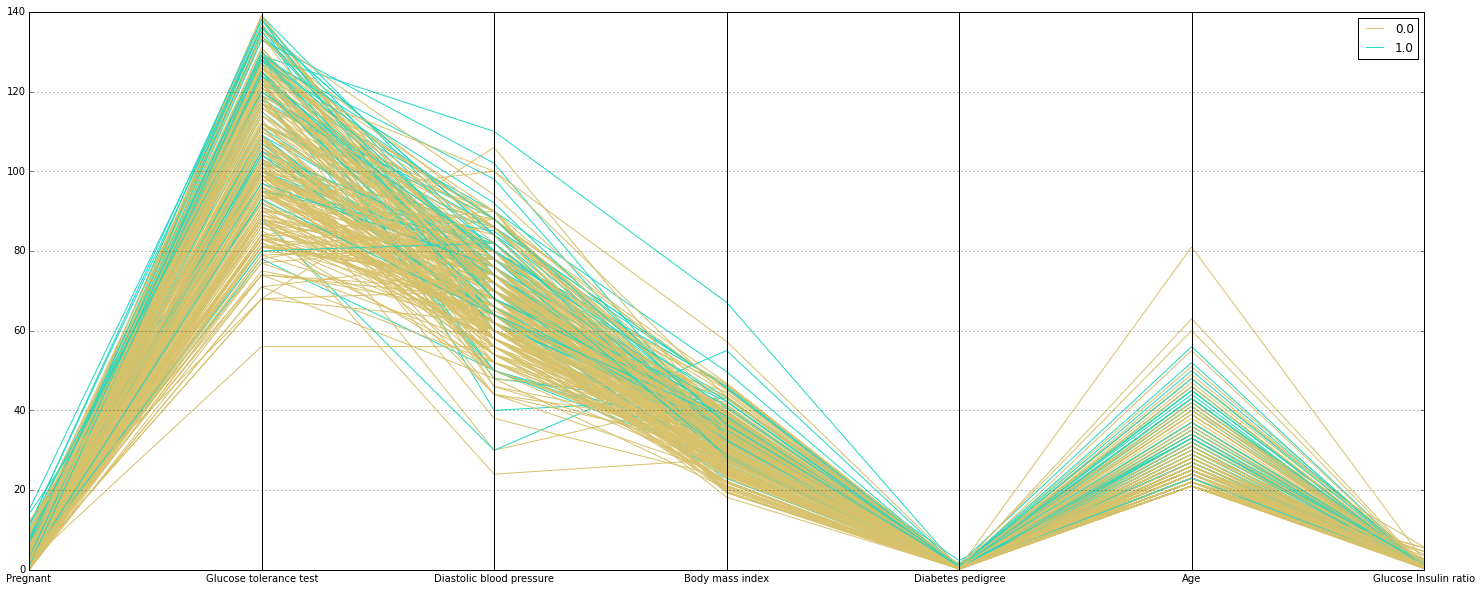

In [162]:
plt.figure(figsize=(25,10))
pd.tools.plotting.parallel_coordinates(pima_predict_df, 'Class variable');

In [179]:

from sklearn.cross_validation import KFold, cross_val_score
y, X = pima_predict_df['Class variable'], pima_predict_df.drop(['Class variable'], axis=1)
# Set up test and training
                                                    
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

# create the shuffle variable
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

# create parametes are fit model with data
parameters = {'alpha': np.linspace(1e-4, 1, 10)}
nbayes = MultinomialNB()
clf = GridSearchCV(nbayes, parameters, cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(227, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.11200e-01,   2.22300e-01,   3.33400e-01,
         4.44500e-01,   5.55600e-01,   6.66700e-01,   7.77800e-01,
         8.88900e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [182]:
clf.best_score_

0.7847826086956522

In [180]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

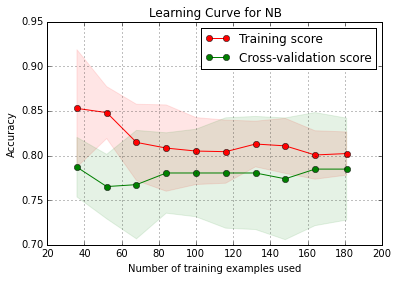

In [181]:
best_nb = clf.best_estimator_
plot_learning_curve(best_nb, 'Learning Curve for NB', X_train, y_train, cv=cv);

**7. What's the best performance you can get with Logistic Regression? Is LR a good choice for this dataset?**
==

In [184]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# create a new predict dataframe to split into test and train
# do not drop Glucose Insulin ratio
# drop rows where 2-hour serum insulin == 0

pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0) & 
                     (pima_indian_data['Glucose tolerance test'] < 140) & 
                     (pima_indian_data['Diastolic blood pressure'] > 0) &
                     (pima_indian_data['2-Hour serum insulin'] > 0) &
                    (pima_indian_data['Body mass index'] > 0)].drop(
                    ['Triceps thickness', '2-Hour serum insulin'], axis=1)

pima_predict_df.describe()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Body mass index,Diabetes pedigree,Age,Class variable,Glucose Insulin ratio
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2.841549,106.982394,69.161972,32.355634,0.498085,28.816901,0.204225,1.202708
std,2.870509,17.831060,12.684058,7.058704,0.314989,8.758737,0.403846,0.768878
min,0.000000,56.000000,24.000000,18.200000,0.085000,21.000000,0.000000,0.206667
25%,1.000000,94.000000,62.000000,27.500000,0.262750,23.000000,0.000000,0.730366
50%,2.000000,106.000000,70.000000,32.450000,0.439000,26.000000,0.000000,1.048529
75%,4.000000,123.000000,78.000000,36.525000,0.650250,32.000000,0.000000,1.425325
max,15.000000,139.000000,110.000000,67.100000,2.288000,81.000000,1.000000,5.727273


In [186]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import ShuffleSplit


# split data
y, X = pima_predict_df['Class variable'], pima_predict_df.drop(['Class variable'], axis=1)
# Set up test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# 10 cross validation iterations with 20% test / 80% train
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)

feature_cols = ['Pregnant', 'Glucose tolerance test', 'Diastolic blood pressure',
                'Body mass index', 'Diabetes pedigree',
               'Age', 'Glucose Insulin ratio']


logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pregnant', 0.21225947452941327),
 ('Glucose tolerance test', 0.78461284957722144),
 ('Diastolic blood pressure', 0.20183415366851609),
 ('Body mass index', 0.63097437012999014),
 ('Diabetes pedigree', 0.73122010164455764),
 ('Age', 0.37148078608741603),
 ('Glucose Insulin ratio', -0.14317357547042742)]

In [187]:
# class predictions
y_pred_class = logreg.predict(X_test_std)

# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.788732394366


In [188]:
from sklearn.grid_search import GridSearchCV
# gridsearch for hyperparameters
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'auto']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(213, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [189]:
clf.best_score_

0.81162790697674414

In [191]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

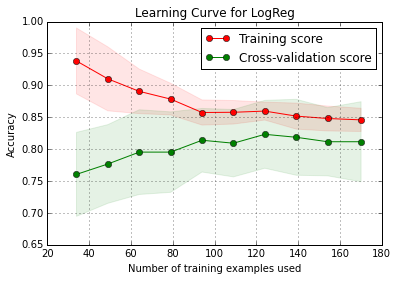

In [192]:
best_log = clf.best_estimator_
plot_learning_curve(best_log, 'Learning Curve for LogReg', X_train_std, y_train, cv=cv);

**8. What's the best performance you can get with Random Forest? Is RF a good choice for this dataset?**
==

In [195]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# create a new predict dataframe to split into test and train
# do not drop Glucose Insulin ratio
# drop rows where 2-hour serum insulin == 0

pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0) & 
                     (pima_indian_data['Glucose tolerance test'] < 140) & 
                     (pima_indian_data['Diastolic blood pressure'] > 0) &
                     (pima_indian_data['2-Hour serum insulin'] > 0) &
                    (pima_indian_data['Body mass index'] > 0)].drop(
                    ['Triceps thickness', '2-Hour serum insulin'], axis=1)

pima_predict_df.describe()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Body mass index,Diabetes pedigree,Age,Class variable,Glucose Insulin ratio
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2.841549,106.982394,69.161972,32.355634,0.498085,28.816901,0.204225,1.202708
std,2.870509,17.831060,12.684058,7.058704,0.314989,8.758737,0.403846,0.768878
min,0.000000,56.000000,24.000000,18.200000,0.085000,21.000000,0.000000,0.206667
25%,1.000000,94.000000,62.000000,27.500000,0.262750,23.000000,0.000000,0.730366
50%,2.000000,106.000000,70.000000,32.450000,0.439000,26.000000,0.000000,1.048529
75%,4.000000,123.000000,78.000000,36.525000,0.650250,32.000000,0.000000,1.425325
max,15.000000,139.000000,110.000000,67.100000,2.288000,81.000000,1.000000,5.727273


In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import ShuffleSplit


# split data
y, X = pima_predict_df['Class variable'], pima_predict_df.drop(['Class variable'], axis=1)
# Set up test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)


forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [213]:
# check out how each feature is contributing
features = X_train.columns
feature_importances = forest.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
4,Diabetes pedigree,0.185264
1,Glucose tolerance test,0.184991
3,Body mass index,0.164569
5,Age,0.140833
6,Glucose Insulin ratio,0.134812


In [214]:
forest.fit(X_train, y_train)
print forest.score(X_test, y_test)

0.774647887324


In [230]:
%%timeit

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

forest.fit(X_train, y_train)
print forest.score(X_test, y_test)

0.746478873239
0.760563380282
0.760563380282
0.774647887324
1 loops, best of 3: 162 ms per loop
